## Summary
- a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
#### *The calculation could be wrong because of outliers inside dataset. Therefore, to make it better, we have to remove the outliers from calculation*
- b. What metric would you report for this dataset?
#### After remove the outliers, the mean value is used in this case.
- c.What is its value?
#### 296


In [1]:
! ls *.csv

2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv


In [2]:
import pandas as pd 
import numpy as np 

df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.shape

(5000, 7)

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
df.tail()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18
4999,5000,44,734,288,2,debit,2017-03-18 15:48:18


In [5]:
# View missing values and dtype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [6]:
# view statistic for numeric columns
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


- This data set have very long outliers in the columns order_amount and total_items. It could cause the wrong AOV calculation.
- In this case, a better way to evaluate this data is to remove the outliers


- Indeed, the wrong error come from lacking of pre-processing the data before

- Now, try to check and remove duplicate and outlier

In [7]:
q95 = df['order_amount'].quantile(0.95)
df1 =  df.query('order_amount > @q95')
df1

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
22,23,88,985,704,4,credit_card,2017-03-22 1:19:41
45,46,29,969,652,4,credit_card,2017-03-04 8:58:23
53,54,33,842,692,4,debit,2017-03-08 7:36:34
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
...,...,...,...,...,...,...,...
4918,4919,78,823,25725,1,cash,2017-03-15 13:26:46
4927,4928,74,849,765,5,cash,2017-03-28 6:55:57
4952,4953,26,786,880,5,cash,2017-03-17 1:50:18
4958,4959,70,711,865,5,credit_card,2017-03-08 17:22:51


Remove the outliers by using

In [8]:
Q1 = df['order_amount'].quantile(0.25)
Q3 = df['order_amount'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['order_amount'] >= Q1 - 1.5 * IQR) & (df['order_amount'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

In [9]:
df['order_amount'].mean()

293.7153735336489

In [10]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,2497.395966,49.852645,849.905742,293.715374,1.950196
std,1443.356555,29.049171,86.887496,144.453395,0.919791
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1244.500000,24.000000,776.000000,162.000000,1.000000
50%,2498.000000,50.000000,850.000000,280.000000,2.000000
75%,3749.500000,74.000000,925.000000,380.000000,3.000000
max,5000.000000,100.000000,999.000000,730.000000,5.000000


In [11]:
import seaborn as sns

<AxesSubplot:xlabel='order_amount'>

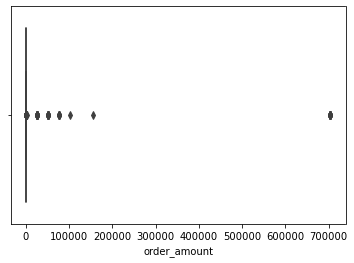

In [12]:
# original data is very skew
sns.boxplot(pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")['order_amount'])

<AxesSubplot:xlabel='order_amount'>

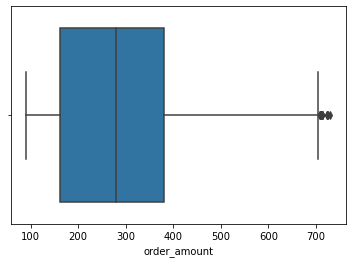

In [13]:
sns.boxplot(df['order_amount'])